In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Big Mart Sales\\Big_Mart_Sales_train.csv")
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Missing Values

In [4]:
#Part 1 --> Item Weight
#The following code will print the min, max and average of Item_Weights based on Item_Type.

for i in sales.Item_Type.unique():
    group = sales[sales['Item_Type']==i]
    print(i)
    print('Minimum: %f' %group['Item_Weight'].min(), "  ", 'Maximum: %f' %group['Item_Weight'].max(), "  " ,'Average: %f' %group['Item_Weight'].mean())
    print("")

Dairy
Minimum: 4.805000    Maximum: 20.700000    Average: 13.426069

Soft Drinks
Minimum: 4.590000    Maximum: 20.750000    Average: 11.847460

Meat
Minimum: 5.150000    Maximum: 21.250000    Average: 12.817344

Fruits and Vegetables
Minimum: 5.460000    Maximum: 21.350000    Average: 13.224769

Household
Minimum: 5.030000    Maximum: 21.250000    Average: 13.384736

Baking Goods
Minimum: 4.880000    Maximum: 20.850000    Average: 12.277108

Snack Foods
Minimum: 5.095000    Maximum: 21.250000    Average: 12.987880

Frozen Foods
Minimum: 4.555000    Maximum: 20.850000    Average: 12.867061

Breakfast
Minimum: 6.425000    Maximum: 21.100000    Average: 12.768202

Health and Hygiene
Minimum: 5.175000    Maximum: 21.250000    Average: 13.142314

Hard Drinks
Minimum: 4.610000    Maximum: 19.700000    Average: 11.400328

Canned
Minimum: 4.615000    Maximum: 21.350000    Average: 12.305705

Breads
Minimum: 4.635000    Maximum: 20.850000    Average: 11.346936

Starchy Foods
Minimum: 6.695000  

In [5]:
'''
Now I will impute the missing values in "Item_Weight" column by the mean of item_weight of each Item_type.
eg: For "Dairy" item_type, if there are any missing values in item_weight corresponding to Dairy, then I will impute the mean to that missing value.
This is checked and imputed for every unique Item_type.
'''

for i in sales.Item_Type.unique():
    group1 = sales[sales['Item_Type'] == i]
    ave = group1['Item_Weight'].mean()
    group1['Item_Weight'] = group1['Item_Weight'].fillna(ave)
   
    sales.loc[sales['Item_Weight'].isnull(),'Item_Weight'] = group1['Item_Weight']

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
'''
Part 2 --> Outlet_Size 

Does Outlet_Size depends upon Outlet_Type?
Let's find the mode of Outlet_Size based on Outlet_Type.
'''

for i in sales.Outlet_Type.unique():
    print(i)
    mode = sales['Outlet_Size'].mode()
    print(mode)

Supermarket Type1
0    Medium
dtype: object
Supermarket Type2
0    Medium
dtype: object
Grocery Store
0    Medium
dtype: object
Supermarket Type3
0    Medium
dtype: object


In [8]:
'''
So, for all Outlet_Type, the mode of Outlet_Size is 'Medium'.
Lets's impute Medium to the missing values.
'''

outlet_size_mode = sales['Outlet_Size'].mode()[0]
sales['Outlet_Size'] = sales['Outlet_Size'].fillna(outlet_size_mode)

In [9]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outliers, Feature Engineering and Transformation

#### Numeric Features

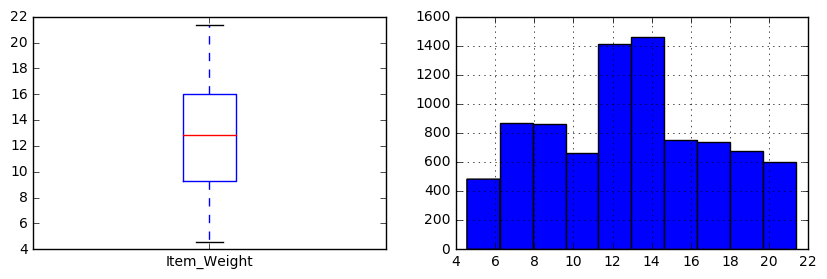

In [10]:
# Part 1 ---> Item_Weight
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Weight'].plot(kind='box')

plt.subplot(122)
sales['Item_Weight'].hist()

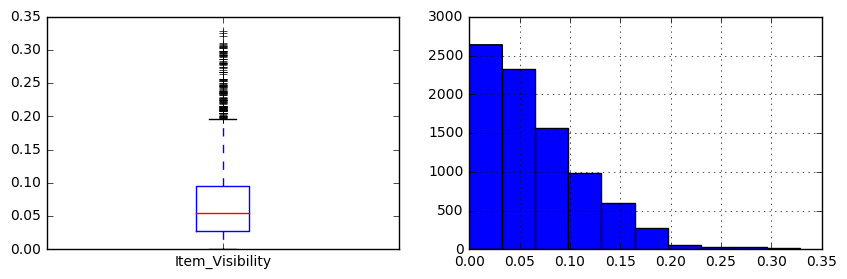

In [11]:
# Part 2--> Item_Visibility
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Visibility'].plot(kind='box')

plt.subplot(122)
sales['Item_Visibility'].hist()

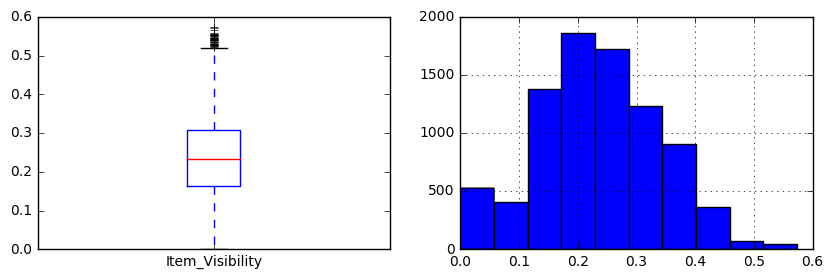

In [12]:
# This distribution is right skewed and there are some extreme outliers.
# Lets apply transformation and check whether that fixes the problem of outliers.
plt.figure(figsize=[10,3])
plt.subplot(121)
np.sqrt(sales['Item_Visibility']).plot(kind='box')

plt.subplot(122)
np.sqrt(sales['Item_Visibility']).hist()

In [13]:
# This distribution looks good. Lets apply this transformation.
sales['Item_Visibility'] = np.sqrt(sales['Item_Visibility'])

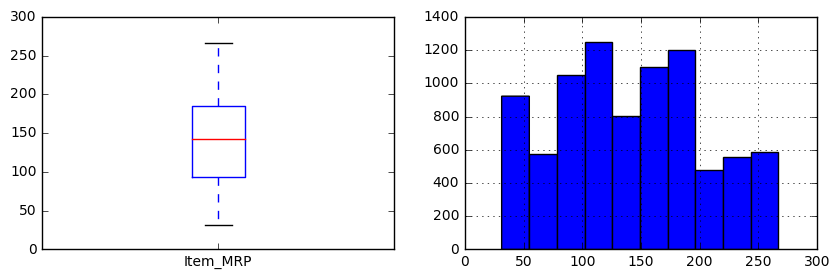

In [14]:
# Part 3 --> Item_MRP
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_MRP'].plot(kind='box')

plt.subplot(122)
sales['Item_MRP'].hist()

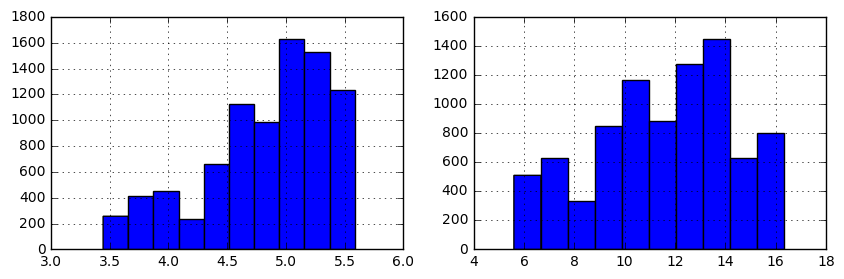

In [15]:
# Let's apply transformation and check if we can get a better distribution than this.
plt.figure(figsize=[10,3])
plt.subplot(121)
np.log(sales['Item_MRP']).hist()

plt.subplot(122)
np.sqrt(sales['Item_MRP']).hist()

In [16]:
# sqrt transformation looks good. Let's apply this.
sales['Item_MRP'] = np.sqrt(sales['Item_MRP'])

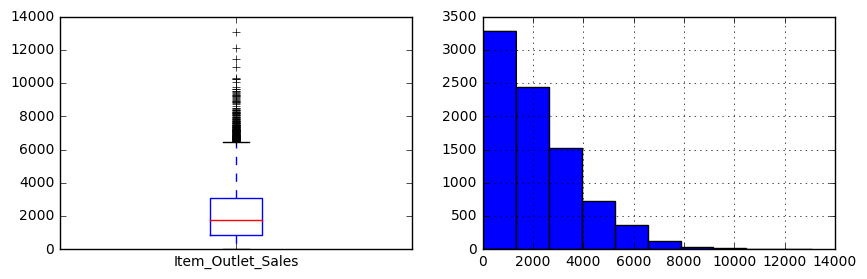

In [17]:
#Part 4 --> Item_Outlet_Sales
plt.figure(figsize=[10,3])
plt.subplot(121)
sales['Item_Outlet_Sales'].plot(kind='box')

plt.subplot(122)
sales['Item_Outlet_Sales'].hist()

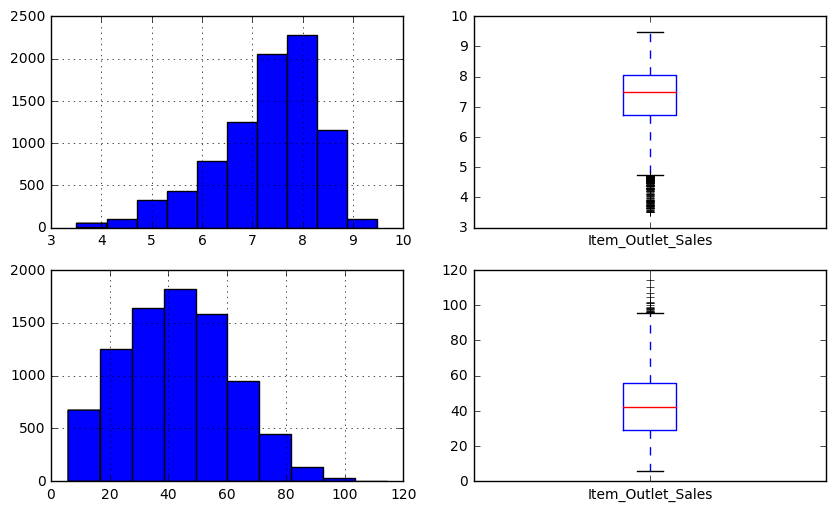

In [18]:
#Applying transformations
plt.figure(figsize=[10,6])
plt.subplot(221)
np.log(sales['Item_Outlet_Sales']).hist()

plt.subplot(222)
np.log(sales['Item_Outlet_Sales']).plot(kind='box')

plt.subplot(223)
np.sqrt(sales['Item_Outlet_Sales']).hist()

plt.subplot(224)
np.sqrt(sales['Item_Outlet_Sales']).plot(kind='box')

In [19]:
# sqrt transformation gives a pretty distribution.
sales['Item_Outlet_Sales'] = np.sqrt(sales['Item_Outlet_Sales'])

In [20]:
# Dividing the Item_Identifiers into 3 groups:
sales['Item_Identifier'].value_counts()
sales['Item_type_new'] = sales['Item_Identifier'].apply(lambda x: x[0:2])
sales['Item_type_new'] = sales['Item_type_new'].map({'FD': 'Food', 'NC':'Non-consumable','DR':'Drinks'})
sales['Item_type_new'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: Item_type_new, dtype: int64

In [21]:
#Finding age of Outlet_Establishment_Year
sales['Outlet_Establishment_Year'] = 2017 - sales['Outlet_Establishment_Year']

#### Categorical Features

In [22]:
#Part 1 --> Item_Fat_Content
sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
sales = sales.replace({'Item_Fat_Content' : { 'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }})

In [24]:
#Part 2--> Outlet_Size
sales['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [25]:
#Part 3--> Outlet_Location_Type
sales['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [26]:
#Part 5 --> Outlet_Type
sales['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
var_i = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new']
for i in var_i:
    sales[i] = label.fit_transform(sales[i])

In [28]:
sales = pd.get_dummies(sales, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type_new'])
sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,FDA15,9.30,0.126678,Dairy,15.805354,OUT049,18,61.115775,1,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.138846,Soft Drinks,6.947604,OUT018,8,21.057607,0,1,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.129461,Meat,11.900336,OUT049,18,45.795961,1,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,13.494258,OUT010,19,27.062520,0,1,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,7.339033,OUT013,30,31.538947,1,0,...,0,0,1,0,1,0,0,0,0,1


In [29]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_type_new_0', 'Item_type_new_1',
       'Item_type_new_2'],
      dtype='object')

In [30]:
X = sales.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Item_Type'], axis=1)
y = sales.Item_Outlet_Sales

In [31]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
0,9.30,0.126678,15.805354,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,0.138846,6.947604,8,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,0.129461,11.900336,18,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,13.494258,19,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,7.339033,30,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


#### Checking Correlation

In [32]:
X.corr()[(X.corr() > 0.7) & (X.corr() != 1)]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_type_new_0,Item_type_new_1,Item_type_new_2
Item_Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Fat_Content_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Size_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, random_state=0, test_size=0.3)

#### Checking whether the data is Linear OR Non-Linear:

#### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
print("Training Score:%f" %(lr.score(xtrain,ytrain)))
print("Test Score:%f" %(lr.score(xtest,ytest)))
print("Test RMSE:%f" %(np.sqrt(mean_squared_error(ytest,lr_pred))))

Training Score:0.663847
Test Score:0.657452
Test RMSE:10.946065


#### SVR

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
svr = SVR(kernel='rbf')
svr.fit(xtrain,ytrain)
svr_pred = svr.predict(xtest)
print("Training Score:%f" %(svr.score(xtrain,ytrain)))
print("Test Score:%f" %(svr.score(xtest,ytest)))
print("Test RMSE:%f" %(np.sqrt(mean_squared_error(ytest,svr_pred))))

Training Score:0.660677
Test Score:0.643730
Test RMSE:11.163164
